In [74]:
import seaborn as sns
import numpy as np
import pandas as pd
import glob
import scipy.stats
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('ggplot')
import os
if not os.path.exists("images"):
    os.mkdir("images")
import kaleido 
import plotly.graph_objects as go
import math
from scipy import stats
import matplotlib.pyplot as plt
import math
from scipy import stats
from sklearn import linear_model 
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn import ensemble

In [398]:
housing_pp = pd.read_csv('housing_pp.csv', index_col=0)
housing_pp.shape

(2579, 81)

### Split df into independent and dependent variables 

In [399]:
y = housing_pp.SalePrice
X = housing_pp.drop(['SalePrice', 'PID'], axis =1).copy()

In [400]:
y = list(y)
y

[126000,
 139500,
 124900,
 114000,
 227000,
 198500,
 93000,
 187687,
 137500,
 140000,
 219500,
 136000,
 80000,
 159000,
 214000,
 163000,
 203000,
 67000,
 205000,
 131250,
 181000,
 115000,
 98000,
 265979,
 105500,
 168165,
 201000,
 177500,
 200000,
 450000,
 91300,
 173500,
 199500,
 207000,
 155000,
 220000,
 196000,
 61500,
 195000,
 129250,
 291000,
 134000,
 186000,
 133500,
 148000,
 325300,
 215000,
 131000,
 109500,
 110000,
 150000,
 193800,
 178000,
 179600,
 179000,
 140000,
 395000,
 151500,
 341000,
 235000,
 72000,
 154000,
 222000,
 390000,
 128200,
 615000,
 158000,
 254000,
 169000,
 284500,
 184500,
 210400,
 214000,
 392500,
 274725,
 156932,
 282922,
 144000,
 88000,
 67500,
 148000,
 159000,
 120000,
 134900,
 185000,
 132500,
 160500,
 165000,
 100000,
 189900,
 227875,
 111900,
 145000,
 118000,
 166000,
 148000,
 99000,
 86000,
 165000,
 211500,
 210000,
 228500,
 132000,
 468000,
 240000,
 151500,
 73000,
 75500,
 500067,
 330000,
 107500,
 172500,
 1850

In [262]:
X

,GrLivArea,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,856,30,RL,62.472926,7890,Pave,0.0,1,4,4,...,166,0,0.0,NaN,NaN,0,3,2010,WD,Normal
1,1049,120,RL,42.000000,4235,Pave,0.0,1,4,4,...,0,0,0.0,NaN,NaN,0,2,2009,WD,Normal
2,1001,30,C (all),60.000000,6060,Pave,0.0,1,4,4,...,0,0,0.0,NaN,NaN,0,11,2007,WD,Normal
3,1039,70,RL,80.000000,8146,Pave,0.0,1,4,4,...,111,0,0.0,NaN,NaN,0,5,2009,WD,Normal
4,1665,60,RL,70.000000,8400,Pave,0.0,1,4,4,...,0,0,0.0,NaN,NaN,0,11,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,952,30,RL,70.105866,8854,Pave,0.0,1,4,4,...,40,0,0.0,NaN,NaN,0,5,2009,WD,Normal
2576,1733,20,RL,108.318076,13680,Pave,0.0,2,4,4,...,0,0,0.0,NaN,NaN,0,6,2009,WD,Normal
2577,2002,90,RH,82.000000,6270,Pave,0.0,1,2,4,...,0,0,0.0,NaN,NaN,0,8,2007,WD,Normal
2578,1842,60,RL,69.884162,8826,Pave,0.0,1,4,4,...,0,0,0.0,NaN,NaN,0,7,2007,WD,Normal


### Use column selector to split data into categorical and numerical variables 
Double check that all columns have been included

In [79]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

In [80]:
numerical_columns = numerical_columns_selector(X)
categorical_columns = categorical_columns_selector(X)

In [81]:
len(numerical_columns) + len(categorical_columns) + 2
# +2 for the two dropped columns 

81

### Dummify categorical variables and standardize numerical 
This is just for lasso to start 
This will need to be modified based on the preprocessing for different types of regression

In [352]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore", drop= 'first')
numerical_preprocessor = StandardScaler()

In [353]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    [
        ("standard_scaler", numerical_preprocessor, numerical_columns),
        ("one-hot-encoder", categorical_preprocessor, categorical_columns),
    ]
)

,GrLivArea,MSSubClass,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LandSlope,OverallQual,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold
0,856,30,62.472926,7890,0.0,1,4,4,3,6,...,0,0,0,0,166,0,0.0,0,3,2010
1,1049,120,42.000000,4235,0.0,1,4,4,3,5,...,0,105,0,0,0,0,0.0,0,2,2009
2,1001,30,60.000000,6060,0.0,1,4,4,3,5,...,154,0,42,86,0,0,0.0,0,11,2007
3,1039,70,80.000000,8146,0.0,1,4,4,3,4,...,0,0,168,0,111,0,0.0,0,5,2009
4,1665,60,70.000000,8400,0.0,1,4,4,3,8,...,0,45,0,0,0,0,0.0,0,11,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,952,30,70.105866,8854,0.0,1,4,4,3,6,...,0,98,0,0,40,0,0.0,0,5,2009
2576,1733,20,108.318076,13680,0.0,2,4,4,3,3,...,0,0,0,0,0,0,0.0,0,6,2009
2577,2002,90,82.000000,6270,0.0,1,2,4,3,5,...,0,0,0,0,0,0,0.0,0,8,2007
2578,1842,60,69.884162,8826,0.0,1,4,4,3,7,...,193,96,0,0,0,0,0.0,0,7,2007


In [84]:
ols = linear_model.LinearRegression()
ridge = linear_model.Ridge()
lasso = linear_model.Lasso()
net = linear_model.ElasticNet()
sgd = linear_model.SGDClassifier
tree = DecisionTreeRegressor

In [250]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42
)

In [427]:
from sklearn.pipeline import make_pipeline

lasso_pipe = make_pipeline(preprocessor, linear_model.Lasso(alpha =.001))

In [364]:
import warnings
warnings.filterwarnings('ignore')
lasso_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standard_scaler',
                                                  StandardScaler(),
                                                  ['GrLivArea', 'MSSubClass',
                                                   'LotFrontage', 'LotArea',
                                                   'Alley', 'LotShape',
                                                   'LandContour', 'Utilities',
                                                   'LandSlope', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'ExterQual', 'ExterCond',
                                                   'BsmtQual', 'BsmtCond',
                                                   'BsmtExposure',
                                                   'BsmtFinT...
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['MSZoning', 'Street',
                                                   'LotConfig', 'Neighborhood',
                                                   'Condition1', 'Condition2',
                                                   'BldgType', 'HouseStyle',
                                                   'RoofStyle', 'RoofMatl',
                                                   'Exterior1st', 'Exterior2nd',
                                                   'MasVnrType', 'Foundation',
                                                   'Heating', 'CentralAir',
                                                   'Electrical', 'GarageType',
                                                   'Fence', 'MiscFeature',
                                                   'SaleType',
                                                   'SaleCondition'])])),
                ('lasso', Lasso(alpha=10))])

In [365]:
lasso_pipe.score(X_train, y_train)

0.9238111256165021

In [366]:
lasso_pipe.score(X_test, y_test)

0.911580269642419

### Check to make sure we are getting the same results without the pipe
**** The categorical variables need to be transformed when they are all together otherwise we might end up getting values that do not exist in training but do exist in testing 

In [263]:
X_ = X
X_

,GrLivArea,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,856,30,RL,62.472926,7890,Pave,0.0,1,4,4,...,166,0,0.0,NaN,NaN,0,3,2010,WD,Normal
1,1049,120,RL,42.000000,4235,Pave,0.0,1,4,4,...,0,0,0.0,NaN,NaN,0,2,2009,WD,Normal
2,1001,30,C (all),60.000000,6060,Pave,0.0,1,4,4,...,0,0,0.0,NaN,NaN,0,11,2007,WD,Normal
3,1039,70,RL,80.000000,8146,Pave,0.0,1,4,4,...,111,0,0.0,NaN,NaN,0,5,2009,WD,Normal
4,1665,60,RL,70.000000,8400,Pave,0.0,1,4,4,...,0,0,0.0,NaN,NaN,0,11,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,952,30,RL,70.105866,8854,Pave,0.0,1,4,4,...,40,0,0.0,NaN,NaN,0,5,2009,WD,Normal
2576,1733,20,RL,108.318076,13680,Pave,0.0,2,4,4,...,0,0,0.0,NaN,NaN,0,6,2009,WD,Normal
2577,2002,90,RH,82.000000,6270,Pave,0.0,1,2,4,...,0,0,0.0,NaN,NaN,0,8,2007,WD,Normal
2578,1842,60,RL,69.884162,8826,Pave,0.0,1,4,4,...,0,0,0.0,NaN,NaN,0,7,2007,WD,Normal


In [256]:
#X_[numerical_columns] = StandardScaler().fit_transform(X_[numerical_columns])
#X_

,GrLivArea,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,-1.289220,-0.647048,RL,-0.228004,-0.274310,Pave,-0.248037,-0.703943,0.294819,0.027859,...,2.638313,-0.054802,-0.056524,NaN,NaN,-0.09775,-1.180936,1.647248,WD,Normal
1,-0.894237,1.455666,RL,-0.647755,-0.724056,Pave,-0.248037,-0.703943,0.294819,0.027859,...,-0.284593,-0.054802,-0.056524,NaN,NaN,-0.09775,-1.555552,0.884956,WD,Normal
2,-0.992472,-0.647048,C (all),-0.278706,-0.499491,Pave,-0.248037,-0.703943,0.294819,0.027859,...,-0.284593,-0.054802,-0.056524,NaN,NaN,-0.09775,1.815997,-0.639628,WD,Normal
3,-0.914703,0.287491,RL,0.131350,-0.242810,Pave,-0.248037,-0.703943,0.294819,0.027859,...,1.669880,-0.054802,-0.056524,NaN,NaN,-0.09775,-0.431702,0.884956,WD,Normal
4,0.366433,0.053856,RL,-0.073678,-0.211555,Pave,-0.248037,-0.703943,0.294819,0.027859,...,-0.284593,-0.054802,-0.056524,NaN,NaN,-0.09775,1.815997,0.884956,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,-1.092752,-0.647048,RL,-0.071507,-0.155691,Pave,-0.248037,-0.703943,0.294819,0.027859,...,0.419721,-0.054802,-0.056524,NaN,NaN,-0.09775,-0.431702,0.884956,WD,Normal
2576,0.505598,-0.880683,RL,0.711948,0.438146,Pave,-0.248037,1.048441,0.294819,0.027859,...,-0.284593,-0.054802,-0.056524,NaN,NaN,-0.09775,-0.057086,0.884956,WD,Normal
2577,1.056117,0.754761,RH,0.172355,-0.473651,Pave,-0.248037,-0.703943,-3.153427,0.027859,...,-0.284593,-0.054802,-0.056524,NaN,NaN,-0.09775,0.692147,-0.639628,WD,Normal
2578,0.728671,0.053856,RL,-0.076053,-0.159136,Pave,-0.248037,-0.703943,0.294819,0.027859,...,-0.284593,-0.054802,-0.056524,NaN,NaN,-0.09775,0.317531,-0.639628,WD,Normal


In [264]:
ohe = OneHotEncoder(handle_unknown="ignore", drop = 'first')
#ohe.fit(X_[categorical_columns])
#X_ = ohe.transform(X_[categorical_columns])
#ohe.categories_
#ohe.fit(X_[categorical_columns])
#X_

In [230]:
#X_.drop(X_[categorical_columns], axis = 1)
#X_

,GrLivArea,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,856,30,RL,62.472926,7890,Pave,0.0,1,4,4,...,166,0,0.0,NaN,NaN,0,3,2010,WD,Normal
1,1049,120,RL,42.000000,4235,Pave,0.0,1,4,4,...,0,0,0.0,NaN,NaN,0,2,2009,WD,Normal
2,1001,30,C (all),60.000000,6060,Pave,0.0,1,4,4,...,0,0,0.0,NaN,NaN,0,11,2007,WD,Normal
3,1039,70,RL,80.000000,8146,Pave,0.0,1,4,4,...,111,0,0.0,NaN,NaN,0,5,2009,WD,Normal
4,1665,60,RL,70.000000,8400,Pave,0.0,1,4,4,...,0,0,0.0,NaN,NaN,0,11,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,952,30,RL,70.105866,8854,Pave,0.0,1,4,4,...,40,0,0.0,NaN,NaN,0,5,2009,WD,Normal
2576,1733,20,RL,108.318076,13680,Pave,0.0,2,4,4,...,0,0,0.0,NaN,NaN,0,6,2009,WD,Normal
2577,2002,90,RH,82.000000,6270,Pave,0.0,1,2,4,...,0,0,0.0,NaN,NaN,0,8,2007,WD,Normal
2578,1842,60,RL,69.884162,8826,Pave,0.0,1,4,4,...,0,0,0.0,NaN,NaN,0,7,2007,WD,Normal


In [232]:
#a = pd.DataFrame(ohe.transform(X_[categorical_columns]).toarray())

In [236]:
#X_ = pd.concat([X_, a], axis = 1)


In [212]:
#pd.DataFrame(preprocessor.fit_transform(X))

,0,1,2,3,4,5,6,7,8,9,...,219,220,221,222,223,224,225,226,227,228
0,-1.289220,-0.647048,-0.228004,-0.274310,-0.248037,-0.703943,0.294819,0.027859,0.213295,-0.034027,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.894237,1.455666,-0.647755,-0.724056,-0.248037,-0.703943,0.294819,0.027859,0.213295,-0.765323,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.992472,-0.647048,-0.278706,-0.499491,-0.248037,-0.703943,0.294819,0.027859,0.213295,-0.765323,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.914703,0.287491,0.131350,-0.242810,-0.248037,-0.703943,0.294819,0.027859,0.213295,-1.496619,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.366433,0.053856,-0.073678,-0.211555,-0.248037,-0.703943,0.294819,0.027859,0.213295,1.428565,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2574,-1.092752,-0.647048,-0.071507,-0.155691,-0.248037,-0.703943,0.294819,0.027859,0.213295,-0.034027,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2575,0.505598,-0.880683,0.711948,0.438146,-0.248037,1.048441,0.294819,0.027859,0.213295,-2.227916,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2576,1.056117,0.754761,0.172355,-0.473651,-0.248037,-0.703943,-3.153427,0.027859,0.213295,-0.765323,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2577,0.728671,0.053856,-0.076053,-0.159136,-0.248037,-0.703943,0.294819,0.027859,0.213295,0.697269,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


Take pre processed data and see if we get the same results 

In [426]:
lasso_test = linear_model.Lasso(alpha =.001)

In [267]:
X_train_test = pd.DataFrame(preprocessor.fit_transform(X_train))
X_train_test

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-0.478490,2.383561,-0.764995,-0.717498,5.339493,1.065833,0.301524,0.032174,0.217328,0.723774,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,-1.007311,2.383561,-1.044731,-0.995578,-0.246971,-0.706584,0.301524,0.032174,0.217328,-0.011790,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.466551,-0.882001,-0.285449,0.064980,-0.246971,1.065833,0.301524,0.032174,0.217328,0.723774,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.896846,0.051017,0.234060,0.220500,-0.246971,-0.706584,0.301524,0.032174,0.217328,-0.747354,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,-0.755970,-0.882001,-0.125600,0.359718,-0.246971,-0.706584,0.301524,0.032174,0.217328,-0.747354,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1929,0.339875,0.051017,-0.605146,0.537608,-0.246971,2.838251,0.301524,0.032174,0.217328,0.723774,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1930,-0.651413,3.083325,-0.105619,0.099130,-0.246971,-0.706584,0.301524,0.032174,0.217328,-0.747354,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1931,-0.014013,0.051017,-0.165562,-0.228687,-0.246971,-0.706584,0.301524,0.032174,0.217328,-0.011790,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1932,-0.953022,-0.882001,0.014268,-0.269144,-0.246971,1.065833,0.301524,0.032174,0.217328,-0.747354,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [268]:
X_test_test = pd.DataFrame(preprocessor.transform(X_test))
X_test_test

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-0.599134,-0.882001,-0.305430,-0.332803,-0.246971,-0.706584,0.301524,0.032174,0.217328,-0.011790,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.361993,0.051017,-0.025694,0.151129,-0.246971,-0.706584,0.301524,0.032174,0.217328,0.723774,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-1.174201,-0.298865,-0.465279,-0.481541,-0.246971,-0.706584,0.301524,0.032174,0.217328,-0.011790,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-1.077687,-0.882001,-0.145581,-0.207864,-0.246971,1.065833,0.301524,0.032174,0.217328,-0.011790,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.629419,0.284271,-0.065656,0.495367,-0.246971,1.065833,0.301524,0.032174,0.217328,-0.011790,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,0.750063,0.051017,-0.005713,-0.029260,-0.246971,-0.706584,0.301524,0.032174,0.217328,1.459337,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
641,-0.703692,0.517526,0.294004,0.626494,-0.246971,-0.706584,0.301524,0.032174,0.217328,-0.011790,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
642,-0.808249,-0.882001,0.234060,0.018217,-0.246971,-0.706584,0.301524,0.032174,0.217328,-0.747354,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
643,-0.663477,-0.882001,-0.205524,0.359956,-0.246971,-0.706584,0.301524,0.032174,0.217328,-0.011790,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [269]:
lasso_test.fit(X_train_test, y_train)


Lasso(alpha=10)

In [270]:
lasso_test.score(X_train_test, y_train)

0.9238111256165021

In [271]:
lasso_test.score(X_test_test, y_test)

0.911580269642419

### Now try with CV

In [72]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(lasso_pipe, X, y, cv=5)
cv_results

{'fit_time': array([0.51965809, 0.62033057, 0.52464223, 0.59902668, 0.5644331 ]),
 'score_time': array([0.01718235, 0.01700473, 0.02583241, 0.01800013, 0.01732898]),
 'test_score': array([0.84987588, 0.91536914, 0.90282227, 0.91898491, 0.90962421])}

### Now looking at everything with box cox
???? in the other notebook y is automatically an np.array 
I have NO IDEA why it's a series now but I had to convert it to an array then change the shape to the correct shape then do the box cox then transpose it 

In [401]:
y = np.array(y)
y = y.reshape(2579,1)
y

array([[126000],
       [139500],
       [124900],
       ...,
       [145000],
       [217500],
       [215000]])

array([[<Axes: title={'center': '0'}>]], dtype=object)

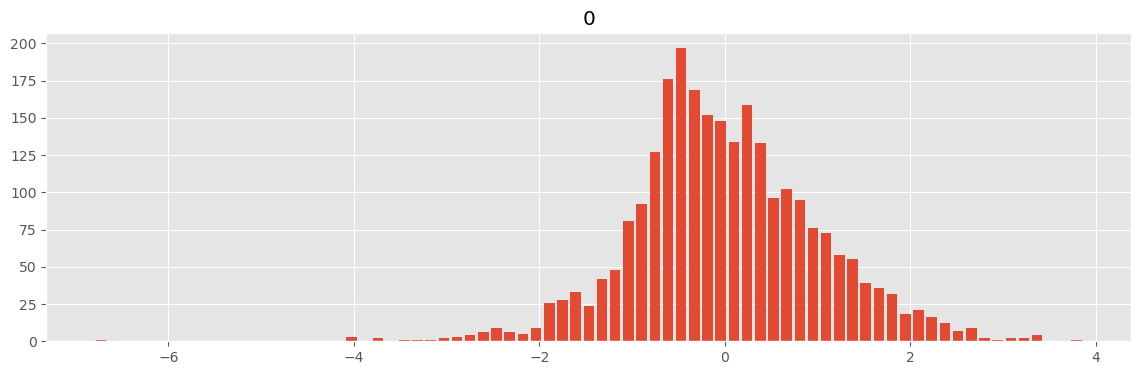

In [414]:
from sklearn.preprocessing import power_transform

y_bc = power_transform(y)
y_bc = y_bc.reshape(-1,1)
y_bc = pd.DataFrame(y_bc)
y_bc.hist(bins=75, rwidth=.8, figsize=(14,4))

In [403]:
X.shape

(2579, 79)

In [404]:
y_bc.shape

(2579, 1)

### How does the model perform with this transformation

In [415]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X, y_bc, random_state=42
)

In [422]:
y_train2

,0
2564,0.110957
839,-1.208031
177,1.177172
426,0.300253
2552,-0.693245
...,...
1638,0.355327
1095,-0.713950
1130,0.142276
1294,-1.348119


In [387]:
X_train2

,GrLivArea,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
2565,1250,160,FV,35.0,4017,Pave,2.0,2,4,4,...,0,0,0.0,NaN,NaN,0,3,2008,WD,Normal
839,987,160,RM,21.0,1680,Pave,0.0,1,4,4,...,0,0,0.0,NaN,NaN,0,2,2008,WD,Normal
177,1720,20,RL,59.0,10593,Pave,0.0,2,4,4,...,0,0,0.0,NaN,NaN,0,3,2010,WD,Normal
426,1934,60,RL,85.0,11900,Pave,0.0,1,4,4,...,200,0,0.0,NaN,NaN,0,7,2009,WD,Normal
2553,1112,20,RL,67.0,13070,Pave,0.0,1,4,4,...,255,0,0.0,NaN,NaN,0,10,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,1657,60,RL,43.0,14565,Pave,0.0,3,4,4,...,0,0,0.0,NaN,Shed,2000,11,2008,WD,Normal
1095,1164,190,RL,68.0,10880,Pave,0.0,1,4,4,...,0,0,0.0,NaN,NaN,0,8,2008,ConLD,Normal
1130,1481,60,RL,65.0,8125,Pave,0.0,1,4,4,...,0,0,0.0,NaN,NaN,0,3,2009,WD,Normal
1294,1014,20,RL,74.0,7785,Pave,0.0,2,4,4,...,200,0,0.0,GdWo,NaN,0,3,2008,WD,Normal


In [416]:
X_train2_test = pd.DataFrame(preprocessor.fit_transform(X_train2))

In [417]:
X_test2_test = pd.DataFrame(preprocessor.transform(X_test2))

In [428]:
lasso_test.fit(X_train2_test, y_train2)

Lasso(alpha=0.001)

In [429]:
lasso_test.score(X_train2_test, y_train2)

0.9251779471494135